In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew
from scipy.stats import chisquare
from scipy.stats import kruskal
import scikit_posthocs
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [3]:
df = pd.read_excel(r"C:\Users\rayde\Desktop\DSI_kickstarterscrape_dataset.xlsx", parse_dates=['funded date'])

In [4]:
df.columns

Index(['project id', 'name', 'url', 'category', 'subcategory', 'location',
       'status', 'goal', 'pledged', 'funded percentage', 'backers',
       'funded date', 'levels', 'reward levels', 'updates', 'comments',
       'duration'],
      dtype='object')

In [5]:
df.describe()

,project id,goal,pledged,funded percentage,backers,levels,updates,comments,duration
count,4.595700e+04,4.595700e+04,4.594500e+04,45957.000000,45957.000000,45957.000000,45957.00000,45957.000000,45957.000000
mean,1.080800e+09,1.194271e+04,4.980750e+03,1.850129,69.973192,8.004939,4.08508,8.379529,39.995547
std,6.218057e+08,1.887583e+05,5.674162e+04,88.492706,688.628479,4.233907,6.43922,174.015737,17.414458
min,3.940900e+04,1.000000e-02,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,5.438962e+08,1.800000e+03,1.960000e+02,0.044000,5.000000,5.000000,0.00000,0.000000,30.000000
50%,1.078345e+09,4.000000e+03,1.310000e+03,1.000000,23.000000,7.000000,2.00000,0.000000,32.000000
75%,1.621596e+09,9.862000e+03,4.165000e+03,1.115640,59.000000,10.000000,6.00000,3.000000,48.390000
max,2.147460e+09,2.147484e+07,1.026684e+07,15066.000000,87142.000000,80.000000,149.00000,19311.000000,91.960000


## Browse Duplicates

In [6]:
bool_filter = df['project id'].duplicated() == True
values = list(df['project id'][bool_filter].values)
df[df['project id'].isin(values)].sort_values('project id')

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
45651,2140333236,Imagined Family Heirlooms: An Archive of Inher...,http://www.kickstarter.com/projects/andersonst...,Photography,Photography,"Little Rock, AR",successful,5800.0,8521.0,1.469138,110,2011-07-29 00:53:53+00:00,16,"$10,$20,$35,$50,$75,$100,$150,$200,$225,$300,$...",5,4,67.00
45652,2140333236,Imagined Family Heirlooms: An Archive of Inher...,http://www.kickstarter.com/projects/andersonst...,Photography,Photography,"Little Rock, AR",successful,5800.0,8521.0,1.469138,110,2011-07-29 00:53:53+00:00,16,"$10,$20,$35,$50,$75,$100,$150,$200,$225,$300,$...",5,4,67.00
45653,2140344109,Help Fund Thana Alexa's Debut Album &quot;Ode ...,http://www.kickstarter.com/projects/1024906052...,Music,Jazz,"New York, NY",successful,15000.0,16678.0,1.111867,142,2012-05-20 20:36:57+00:00,16,"$1,$5,$10,$15,$25,$50,$75,$100,$200,$250,$300,...",5,2,32.00
45654,2140344109,Help Fund Thana Alexa's Debut Album &quot;Ode ...,http://www.kickstarter.com/projects/1024906052...,Music,Jazz,"New York, NY",successful,15000.0,16678.0,1.111867,142,2012-05-20 20:36:57+00:00,16,"$1,$5,$10,$15,$25,$50,$75,$100,$200,$250,$300,...",5,2,32.00
45655,2140513451,The Cookie Chew - Changing the Way We Eat a Co...,http://www.kickstarter.com/projects/1650956569...,Food,Food,"San Diego, CA",successful,4500.0,5540.0,1.231111,89,2010-08-24 04:43:00+00:00,5,"$10,$50,$75,$100,$500",14,17,43.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45930,2146435917,Making Mama(s) Proud: The 2011 &quot;Donna/Mad...,http://www.kickstarter.com/projects/johnpaulka...,Theater,Theater,"Los Angeles, CA",successful,5000.0,5390.0,1.078000,86,2011-06-04 08:56:58+00:00,8,"$1,$10,$25,$50,$100,$200,$500,$1,000",5,1,30.00
45931,2146437406,The Production of Erasure,http://www.kickstarter.com/projects/295025953/...,Photography,Photography,"Brooklyn, NY",successful,1200.0,1220.0,1.016667,17,2011-03-03 04:09:38+00:00,6,"$15,$25,$50,$100,$200,$500",1,0,30.00
45932,2146437406,The Production of Erasure,http://www.kickstarter.com/projects/295025953/...,Photography,Photography,"Brooklyn, NY",successful,1200.0,1220.0,1.016667,17,2011-03-03 04:09:38+00:00,6,"$15,$25,$50,$100,$200,$500",1,0,30.00
45933,2146534146,CALLING on ANGELS - not FOR KIDS ONLY!,http://www.kickstarter.com/projects/callingona...,Film &amp; Video,Film &amp; Video,"Burbank, CA",failed,10000.0,250.0,0.025000,1,2011-09-10 19:00:47+00:00,11,"$10,$25,$50,$75,$100,$150,$250,$500,$1,000,$1,...",0,0,60.00


In [7]:
df[df['project id'].duplicated(keep=False)].sort_values(by='project id').head()

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
45651,2140333236,Imagined Family Heirlooms: An Archive of Inher...,http://www.kickstarter.com/projects/andersonst...,Photography,Photography,"Little Rock, AR",successful,5800.0,8521.0,1.469138,110,2011-07-29 00:53:53+00:00,16,"$10,$20,$35,$50,$75,$100,$150,$200,$225,$300,$...",5,4,67.00
45652,2140333236,Imagined Family Heirlooms: An Archive of Inher...,http://www.kickstarter.com/projects/andersonst...,Photography,Photography,"Little Rock, AR",successful,5800.0,8521.0,1.469138,110,2011-07-29 00:53:53+00:00,16,"$10,$20,$35,$50,$75,$100,$150,$200,$225,$300,$...",5,4,67.00
45653,2140344109,Help Fund Thana Alexa's Debut Album &quot;Ode ...,http://www.kickstarter.com/projects/1024906052...,Music,Jazz,"New York, NY",successful,15000.0,16678.0,1.111867,142,2012-05-20 20:36:57+00:00,16,"$1,$5,$10,$15,$25,$50,$75,$100,$200,$250,$300,...",5,2,32.00
45654,2140344109,Help Fund Thana Alexa's Debut Album &quot;Ode ...,http://www.kickstarter.com/projects/1024906052...,Music,Jazz,"New York, NY",successful,15000.0,16678.0,1.111867,142,2012-05-20 20:36:57+00:00,16,"$1,$5,$10,$15,$25,$50,$75,$100,$200,$250,$300,...",5,2,32.00
45655,2140513451,The Cookie Chew - Changing the Way We Eat a Co...,http://www.kickstarter.com/projects/1650956569...,Food,Food,"San Diego, CA",successful,4500.0,5540.0,1.231111,89,2010-08-24 04:43:00+00:00,5,"$10,$50,$75,$100,$500",14,17,43.27


## Drop Duplicates on Project Id / Drop Cancelled or Live Projects

In [8]:
new_df = df.drop_duplicates(subset=['project id'])
new_df = new_df.query('status == "successful" | status =="failed"')

In [9]:
new_df['status'].unique()

array(['successful', 'failed'], dtype=object)

## Fix inconsistent data entry / importation errors

In [10]:
new_df.subcategory.unique()

array(['Short Film', 'Board & Card Games', 'Documentary', 'Fashion',
       'Music', 'Illustration', 'Open Software', 'Indie Rock', 'Dance',
       'Fiction', 'Nonfiction', 'Film &amp; Video', 'Theater', 'Games',
       'Art Book', 'Animation', 'Country & Folk', 'Comics', 'Webseries',
       'Technology', 'Performance Art', 'Narrative Film', 'Video Games',
       'Product Design', 'Painting', 'Photography', 'Conceptual Art',
       'Rock', 'Jazz', 'Classical Music', 'Food', 'Art', 'Pop',
       'Journalism', 'Poetry', 'World Music', 'Sculpture', 'Publishing',
       'Electronic Music', "Children's Book", 'Open Hardware',
       'Graphic Design', 'Hip-Hop', 'Public Art', 'Mixed Media',
       'Periodical', 'Crafts', 'Design', 'Digital Art',
       'Board &amp; Card Games', 'Country &amp; Folk'], dtype=object)

In [11]:
new_df.category.unique()

array(['Film & Video', 'Games', 'Fashion', 'Music', 'Art', 'Technology',
       'Dance', 'Publishing', 'Theater', 'Comics', 'Design',
       'Photography', 'Food', 'Film &amp; Video'], dtype=object)

In [12]:
new_df = new_df.replace(to_replace="Film &amp; Video", value="Film & Video")
new_df = new_df.replace(to_replace='Board &amp; Card Games', value="Board & Card Games")
new_df = new_df.replace(to_replace='Country &amp; Folk', value="Country & Folk")

In [13]:
new_df.subcategory.unique()

array(['Short Film', 'Board & Card Games', 'Documentary', 'Fashion',
       'Music', 'Illustration', 'Open Software', 'Indie Rock', 'Dance',
       'Fiction', 'Nonfiction', 'Film & Video', 'Theater', 'Games',
       'Art Book', 'Animation', 'Country & Folk', 'Comics', 'Webseries',
       'Technology', 'Performance Art', 'Narrative Film', 'Video Games',
       'Product Design', 'Painting', 'Photography', 'Conceptual Art',
       'Rock', 'Jazz', 'Classical Music', 'Food', 'Art', 'Pop',
       'Journalism', 'Poetry', 'World Music', 'Sculpture', 'Publishing',
       'Electronic Music', "Children's Book", 'Open Hardware',
       'Graphic Design', 'Hip-Hop', 'Public Art', 'Mixed Media',
       'Periodical', 'Crafts', 'Design', 'Digital Art'], dtype=object)

In [14]:
new_df.category.unique()

array(['Film & Video', 'Games', 'Fashion', 'Music', 'Art', 'Technology',
       'Dance', 'Publishing', 'Theater', 'Comics', 'Design',
       'Photography', 'Food'], dtype=object)

In [15]:
new_df['name'] = new_df.name.str.replace("&quot;", '"')

In [16]:
new_df.name.iloc[4]

'Dinner Party - a short film about friendship... and revenge'

## Create new features out of funded date and location

In [17]:
new_df['year'] = new_df['funded date'].dt.year
new_df['month'] = new_df['funded date'].dt.month
new_df['day'] = new_df['funded date'].dt.day
new_df['time'] = new_df['funded date'].dt.time
new_df['day of week'] = new_df['funded date'].dt.dayofweek
new_df[['year','month', 'day', 'time', 'day of week']]

,year,month,day,time,day of week
0,2011,8,19,19:28:17,4
1,2010,8,2,03:59:00,0
3,2012,4,8,02:14:00,6
4,2011,6,1,15:25:39,2
5,2011,6,22,13:33:00,2
...,...,...,...,...,...
45952,2012,3,30,13:57:00,4
45953,2012,4,22,02:12:10,6
45954,2012,1,16,05:00:00,0
45955,2012,5,19,19:44:47,5


In [18]:
new_df['city'], new_df['state'] = new_df['location'].str.split(', ', 1).str
new_df[['city', 'state', 'location']]

,city,state,location
0,Columbia,MO,"Columbia, MO"
1,Maplewood,NJ,"Maplewood, NJ"
3,Los Angeles,CA,"Los Angeles, CA"
4,Novi,MI,"Novi, MI"
5,Portland,OR,"Portland, OR"
...,...,...,...
45952,Austin,TX,"Austin, TX"
45953,Los Angeles,CA,"Los Angeles, CA"
45954,Los Angeles,CA,"Los Angeles, CA"
45955,Vero Beach,FL,"Vero Beach, FL"


In [19]:
new_df['city'].unique()

array(['Columbia', 'Maplewood', 'Los Angeles', ..., 'Peaks',
       'Lumberville', 'Lake Oswego'], dtype=object)

In [20]:
new_df['state'].unique()

array(['MO', 'NJ', 'CA', 'MI', 'OR', 'TN', 'IL', nan, 'NY', 'DC', 'ID',
       'FL', 'TX', 'CO', 'ME', 'Taiwan', 'IN', 'Norway', 'MN', 'NC', 'MA',
       'PA', 'CT', 'Chile', 'MD', 'HI', 'VA', 'WA', 'AZ', 'OH', 'NV',
       'Haiti', 'GA', 'AL', 'UT', 'Canada', 'LA', 'SC', 'Ecuador', 'WI',
       'Jamaica', 'Argentina', 'Hong Kong', 'Germany', 'NM', 'NE',
       'Guatemala', 'IA', 'WY', 'Australia', 'RI', 'Sweden', 'OK', 'DE',
       'South Africa', 'AK', 'WV', 'Nepal', 'MT', 'KY', 'VT', 'Kenya',
       'Bosnia and Herzegovina', 'Iceland', 'Mexico', 'KS', 'Hungary',
       'Indonesia', 'China', 'SD', 'Cuba', 'Peru', 'Italy', 'Netherlands',
       'Singapore', 'Ethiopia', 'NH', 'New Zealand', 'France',
       'United Kingdom', 'Austria', 'Turkey', 'AR', 'Mt', 'Congo',
       'Colombia', 'India', 'Mongolia', 'MS', 'Israel', 'Dominica',
       'Finland', 'Czech Republic', 'Japan', 'Virgin Islands, U.S.',
       'Lebanon', 'Armenia', 'Portugal', 'Qatar', 'Morocco', 'Martinique',
       'Pue

In [21]:
new_df = new_df.replace(to_replace='Virginia', value="VA")

In [22]:
x, y = new_df[new_df.state == 'Middleburg, MD']['state'].str.split(', ', 1).str
row_val = list(new_df[new_df.state == 'Middleburg, MD'].index)[0]

new_df.loc[[row_val],['city']] = x
new_df.loc[[row_val], ['state']]= y
new_df.loc[row_val]

project id                                                  1637912974
name                                                        Light Ball
url                  http://www.kickstarter.com/projects/819627388/...
category                                                    Technology
subcategory                                                 Technology
location                                            10, Middleburg, MD
status                                                          failed
goal                                                             19500
pledged                                                            103
funded percentage                                           0.00528205
backers                                                              3
funded date                                  2012-03-31 03:59:00+00:00
levels                                                               6
reward levels                         $25,$100,$200,$750,$2,000,$3,500
update

In [23]:
new_df['country'] = new_df['state'].replace(to_replace=r'^..{1}$', value="USA", regex=True)
new_df[new_df.country != 'USA'].head()

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,...,comments,duration,year,month,day,time,day of week,city,state,country
11,727286,Offline Wikipedia iPhone app,http://www.kickstarter.com/projects/dphiffer/o...,Technology,Open Software,NaN,successful,99.0,145.0,1.464646,...,19,79.64,2009,7,14,06:59:59,1,NaN,NaN,NaN
14,893085,Esperanza Farm: A Novel,http://www.kickstarter.com/projects/JesusMaria...,Publishing,Fiction,NaN,failed,6500.0,765.0,0.117692,...,0,60.34,2010,7,16,03:59:00,4,NaN,NaN,NaN
29,1512678,Eyes and Ears on English - comedy/English educ...,http://www.kickstarter.com/projects/1787808582...,Film & Video,Film & Video,"Taipei, Taiwan",failed,12000.0,1502.0,0.125167,...,0,45.00,2011,5,22,05:15:04,6,Taipei,Taiwan,Taiwan
42,2117470,""" Hugo's There "" - Real News. Unbelievably.",http://www.kickstarter.com/projects/mastermind...,Film & Video,Webseries,"Oslo, Norway",failed,8400.0,25.0,0.002976,...,0,42.00,2011,9,5,01:20:25,0,Oslo,Norway,Norway
49,2442649,Dream with Me--A documentary about one year in...,http://www.kickstarter.com/projects/1800556280...,Film & Video,Documentary,NaN,successful,5000.0,5615.0,1.123000,...,7,30.89,2009,10,16,01:08:00,4,NaN,NaN,NaN


In [24]:
series_1 = new_df[new_df.country != 'USA']['state'].apply(lambda x: np.nan)
indices= list(new_df[new_df.country != 'USA'].index)
new_df.loc[indices, ['state']] = series_1

In [25]:
new_df['state'].unique()

array(['MO', 'NJ', 'CA', 'MI', 'OR', 'TN', 'IL', nan, 'NY', 'DC', 'ID',
       'FL', 'TX', 'CO', 'ME', 'IN', 'MN', 'NC', 'MA', 'PA', 'CT', 'MD',
       'HI', 'VA', 'WA', 'AZ', 'OH', 'NV', 'GA', 'AL', 'UT', 'LA', 'SC',
       'WI', 'NM', 'NE', 'IA', 'WY', 'RI', 'OK', 'DE', 'AK', 'WV', 'MT',
       'KY', 'VT', 'KS', 'SD', 'NH', 'AR', 'Mt', 'MS', 'ND'], dtype=object)

In [26]:
new_df['country'].unique()

array(['USA', nan, 'Taiwan', 'Norway', 'Chile', 'Haiti', 'Canada',
       'Ecuador', 'Jamaica', 'Argentina', 'Hong Kong', 'Germany',
       'Guatemala', 'Australia', 'Sweden', 'South Africa', 'Nepal',
       'Kenya', 'Bosnia and Herzegovina', 'Iceland', 'Mexico', 'Hungary',
       'Indonesia', 'China', 'Cuba', 'Peru', 'Italy', 'Netherlands',
       'Singapore', 'Ethiopia', 'New Zealand', 'France', 'United Kingdom',
       'Austria', 'Turkey', 'Congo', 'Colombia', 'India', 'Mongolia',
       'Israel', 'Dominica', 'Finland', 'Czech Republic', 'Japan',
       'Virgin Islands, U.S.', 'Lebanon', 'Armenia', 'Portugal', 'Qatar',
       'Morocco', 'Martinique', 'Puerto Rico', 'Afghanistan', 'Denmark',
       'Tanzania', 'Kazakhstan', 'Zambia', 'Switzerland', 'Egypt',
       'Svalbard and Jan Mayen', 'Liberia', 'Ghana', 'Nicaragua',
       'Russia', 'Ukraine', 'Bulgaria', 'South Korea', 'Brazil', 'Rwanda',
       'Spain', 'Costa Rica', 'Philippines', 'Pakistan', 'El Salvador',
       'Panama', 

## Create Dummy Variables Using LabelEncoder()

In [82]:
obj_cols = ['category', 'subcategory', 'year', 'status', 'month']
label_encoder = LabelEncoder()
for col in obj_cols:
    try:
        new_df[col+"_dummy"] = label_encoder.fit_transform(new_df[col])
    except:
        print('problem with' + col)

In [114]:
new_df['country'] = new_df['country'].astype('str')
new_df.country
new_df['country_dummy'] = label_encoder.fit_transform(new_df['country'])

In [115]:
new_df.country_dummy

0        131
1        131
3        131
4        131
5        131
        ... 
45952    131
45953    131
45954    131
45955    131
45956    131
Name: country_dummy, Length: 41841, dtype: int32

In [28]:
new_df.describe()

,project id,goal,pledged,funded percentage,backers,levels,updates,comments,duration,year,month,day,day of week,category_dummy,subcategory_dummy,year_dummy,status_dummy,month_dummy
count,4.184100e+04,4.184100e+04,4.184100e+04,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000
mean,1.078276e+09,1.041084e+04,5.128665e+03,1.980354,71.098731,7.950646,4.335580,8.327287,40.232153,2011.123205,6.079993,14.957458,3.105781,6.258072,26.105423,2.123205,0.547358,5.079993
std,6.197736e+08,1.480363e+05,5.916179e+04,92.728555,713.994952,4.192497,6.628569,175.451017,17.786219,0.744352,3.331319,9.163120,2.014537,3.160544,13.910777,0.744352,0.497758,3.331319
min,3.940900e+04,1.000000e-02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.426141e+08,1.650000e+03,2.200000e+02,0.051667,5.000000,5.000000,0.000000,0.000000,30.000000,2011.000000,3.000000,7.000000,1.000000,5.000000,14.000000,2.000000,0.000000,2.000000
50%,1.077801e+09,4.000000e+03,1.450000e+03,1.005167,25.000000,7.000000,2.000000,1.000000,32.080000,2011.000000,5.000000,15.000000,3.000000,6.000000,27.000000,2.000000,1.000000,4.000000
75%,1.616992e+09,8.800000e+03,4.400000e+03,1.130000,61.000000,10.000000,6.000000,3.000000,49.080000,2012.000000,9.000000,23.000000,5.000000,8.000000,41.000000,3.000000,1.000000,8.000000
max,2.147460e+09,2.147484e+07,1.026684e+07,15066.000000,87142.000000,80.000000,149.000000,19311.000000,91.960000,2012.000000,12.000000,31.000000,6.000000,12.000000,48.000000,3.000000,1.000000,11.000000


In [29]:
#create interaction between month and year
new_df['year_month'] = new_df['year_dummy'] * new_df['month_dummy']
new_df['year_month'].describe()

count    41841.000000
mean         9.400827
std          5.942987
min          0.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         22.000000
Name: year_month, dtype: float64

## Check Skewness and test for normal distribution
##### mean greater than median, positively skewed
##### mean less than median, negatively skewed
##### mean = median, symmetrical distribution

#### The normal test tests if the distribution of the variable differs from the normal distribution - This is important because the results indicate whether parametric or nonparametric statistical tests should be used. 

In [30]:
x_vars = ['goal', 'updates', 'comments', 'duration', 'year_dummy', 'month', 'day', 'day of week', 'category_dummy', 'subcategory_dummy']
y_vars = ['pledged', 'funded percentage', 'backers', 'status_dummy']

In [31]:
new_df.skew(axis = 0, skipna = True)

project id            -0.008691
goal                 132.451022
pledged              134.091965
funded percentage    134.417943
backers               85.971300
funded date           -0.717252
levels                 2.607894
updates                3.907637
comments              71.633083
duration               1.066485
year                  -0.445769
month                  0.288752
day                    0.057872
day of week           -0.108342
category_dummy        -0.281979
subcategory_dummy     -0.074178
year_dummy            -0.445769
status_dummy          -0.190294
month_dummy            0.288752
year_month             0.367686
dtype: float64

In [32]:
#Reject the null that they are normally distributed
for each in x_vars:
    print(f"{each}:", stats.normaltest(new_df[each],axis = 0, nan_policy='omit'))
for each in y_vars:
    print(f"{each}:", stats.normaltest(new_df[each],axis = 0, nan_policy='omit'))

goal: NormaltestResult(statistic=181221.97474867204, pvalue=0.0)
updates: NormaltestResult(statistic=35981.269196937435, pvalue=0.0)
comments: NormaltestResult(statistic=148916.91323430266, pvalue=0.0)
duration: NormaltestResult(statistic=6185.700723610547, pvalue=0.0)
year_dummy: NormaltestResult(statistic=1611.3934272908994, pvalue=0.0)
month: NormaltestResult(statistic=14727.479581701287, pvalue=0.0)
day: NormaltestResult(statistic=36756.83174117571, pvalue=0.0)
day of week: NormaltestResult(statistic=63622.4356716953, pvalue=0.0)
category_dummy: NormaltestResult(statistic=1072.5833590653822, pvalue=1.2344766744891414e-233)
subcategory_dummy: NormaltestResult(statistic=50316.776119196045, pvalue=0.0)
pledged: NormaltestResult(statistic=182011.5493629134, pvalue=0.0)
funded percentage: NormaltestResult(statistic=182069.71940144463, pvalue=0.0)
backers: NormaltestResult(statistic=158220.52349264896, pvalue=0.0)
status_dummy: NormaltestResult(statistic=146072.00431160198, pvalue=0.0)


## Look at Relationship between outcome variables and duration
#### There seems to be a consistent jump in pledged, percent funded, and backers at around 30 days duration

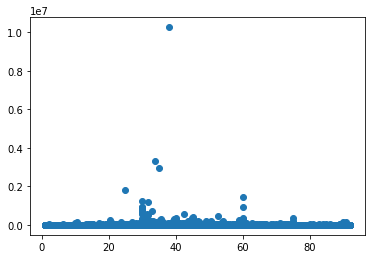

In [33]:
y = new_df['pledged']
x = new_df['duration']
plt.scatter(x,y)
plt.show()

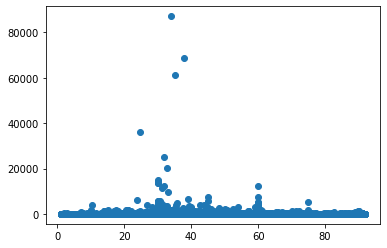

In [34]:
y = new_df['backers']
x = new_df['duration']
plt.scatter(x,y)
plt.show()

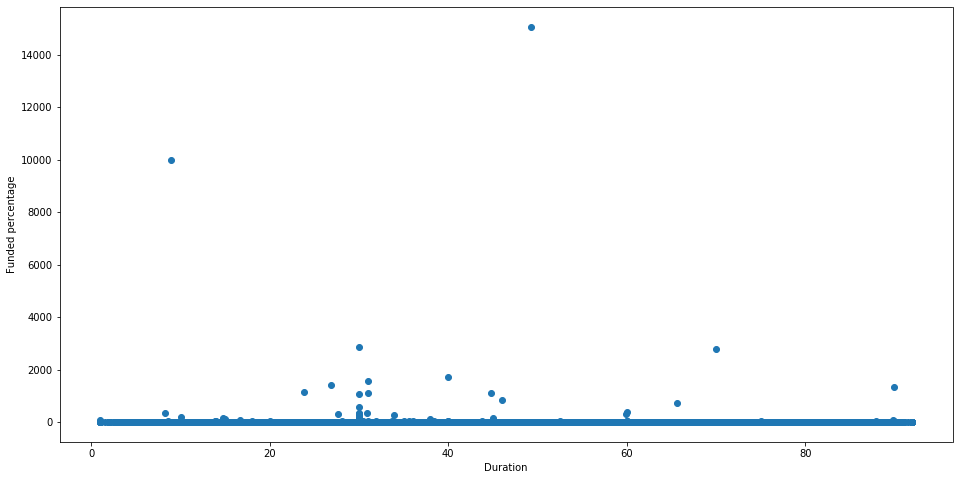

<Figure size 432x288 with 0 Axes>

In [35]:
y = new_df["funded percentage"]
x = new_df['duration']

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(x, y)
ax.set_xlabel('Duration')
ax.set_ylabel('Funded percentage')
plt.show()
plt.savefig('duration_percfunded.jpg')

## Check to see if project listing date is independent to month, day, year, and day of week
#### The Chi-Square test is a statistical hypothesis test to check independence of categorical variables. In this context, we use this test to see if projects are more or less likely to be posted in certain months, on certain days, or in particular years.

In [36]:
month = new_df['project id'].groupby(new_df['month']).count()
stats.chisquare(month)

Power_divergenceResult(statistic=3348.6238617623862, pvalue=0.0)

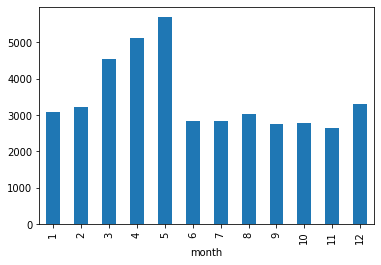

In [37]:
month.plot.bar()

In [38]:
day = new_df['project id'].groupby(new_df['day']).count()
stats.chisquare(day)

Power_divergenceResult(statistic=2642.9375492937547, pvalue=0.0)

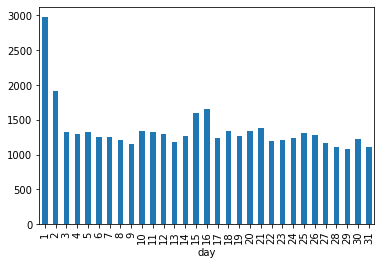

In [39]:
day.plot.bar()

In [40]:
year = new_df['project id'].groupby(new_df['year']).count()
stats.chisquare(year)

Power_divergenceResult(statistic=20089.310747831074, pvalue=0.0)

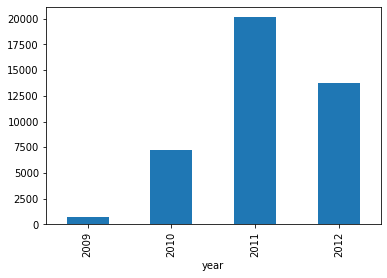

In [41]:
year.plot.bar()

In [42]:
day_of_week = new_df['project id'].groupby(new_df['day of week']).count()
stats.chisquare(day_of_week)

Power_divergenceResult(statistic=295.2817571281757, pvalue=8.387785658465541e-61)

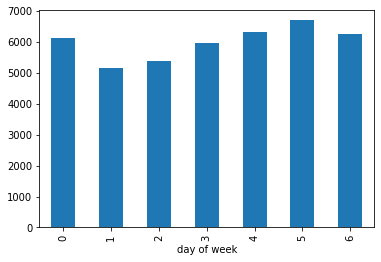

In [43]:
day_of_week.plot.bar()

## Check for joint significance of month, day of week, and year 
#### The F-test tests multiple hypothesis. The null hypothesis is that all slopes/coefficients are zero. Unfortunately the data isn't normally distributed so a parametric test probably isn't appropriate.
##### Month dummies: Jointly significant; Reject Null
##### Year dummies: Jointly significant; Reject Null
##### Day of week dummies: Not Jointly Significant; Do not reject the null

In [44]:
stats.f_oneway(new_df['status_dummy'][new_df['month'] == 1], 
               new_df['status_dummy'][new_df['month'] == 2], 
               new_df['status_dummy'][new_df['month'] == 3],
              new_df['status_dummy'][new_df['month'] == 4],
              new_df['status_dummy'][new_df['month'] == 5],
              new_df['status_dummy'][new_df['month'] == 6],
              new_df['status_dummy'][new_df['month'] == 7],
              new_df['status_dummy'][new_df['month'] == 8],
              new_df['status_dummy'][new_df['month'] == 9],
              new_df['status_dummy'][new_df['month'] == 10],
              new_df['status_dummy'][new_df['month'] == 11],
              new_df['status_dummy'][new_df['month'] == 12])

F_onewayResult(statistic=4.211975575580128, pvalue=2.8486971326095864e-06)

In [45]:
stats.f_oneway(new_df['status_dummy'][new_df['year'] == 2009], 
               new_df['status_dummy'][new_df['year'] == 2010], 
               new_df['status_dummy'][new_df['year'] == 2011],
              new_df['status_dummy'][new_df['year'] == 2012])

F_onewayResult(statistic=15.196937914090293, pvalue=7.012146438986875e-10)

In [46]:
stats.f_oneway(new_df['status_dummy'][new_df['day of week'] == 0], 
               new_df['status_dummy'][new_df['day of week'] == 1], 
               new_df['status_dummy'][new_df['day of week'] == 2],
             new_df['status_dummy'][new_df['day of week'] == 3], 
              new_df['status_dummy'][new_df['day of week'] == 4],  
               new_df['status_dummy'][new_df['day of week'] == 5],
               new_df['status_dummy'][new_df['day of week'] == 6])

F_onewayResult(statistic=1.4494149509388263, pvalue=0.1914102900357102)

## Kruskal-Wallis Test
#### Kruskal-Wallis test is a nonparametric version of the ANOVA test ; Interprets the MEDIAN difference

In [47]:
# compare samples
stat, p = kruskal(new_df['status_dummy'][new_df['month'] == 1], 
               new_df['status_dummy'][new_df['month'] == 2], 
               new_df['status_dummy'][new_df['month'] == 3],
              new_df['status_dummy'][new_df['month'] == 4],
              new_df['status_dummy'][new_df['month'] == 5],
              new_df['status_dummy'][new_df['month'] == 6],
              new_df['status_dummy'][new_df['month'] == 7],
              new_df['status_dummy'][new_df['month'] == 8],
              new_df['status_dummy'][new_df['month'] == 9],
              new_df['status_dummy'][new_df['month'] == 10],
              new_df['status_dummy'][new_df['month'] == 11],
              new_df['status_dummy'][new_df['month'] == 12])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.01
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=46.293, p=0.000
Different distributions (reject H0)


In [48]:
# compare samples
stat, p = kruskal(new_df['status_dummy'][new_df['year'] == 2009], 
                new_df['status_dummy'][new_df['year'] == 2010],
                new_df['status_dummy'][new_df['year'] == 2011],
                new_df['status_dummy'][new_df['year'] == 2012])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.01
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=45.544, p=0.000
Different distributions (reject H0)


In [49]:
# compare samples
stat, p = kruskal(new_df['status_dummy'][new_df['day of week'] == 0], 
               new_df['status_dummy'][new_df['day of week'] == 1], 
               new_df['status_dummy'][new_df['day of week'] == 2],
             new_df['status_dummy'][new_df['day of week'] == 3], 
              new_df['status_dummy'][new_df['day of week'] == 4],  
               new_df['status_dummy'][new_df['day of week'] == 5],
               new_df['status_dummy'][new_df['day of week'] == 6])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.01
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=8.696, p=0.191
Same distributions (fail to reject H0)


## Dunn's Test
#### Dunn's test pinpoints which means are significantly different than the others

In [50]:
# December and March are significantly different 
# December and April are significantly different
# December and November are significantly different 
# April and May are significantly different
scikit_posthocs.posthoc_dunn(new_df, val_col='status_dummy', group_col='month', p_adjust='bonferroni')

,1,2,3,4,5,6,7,8,9,10,11,12
1,1.000000,1.0,0.269449,0.083151,1.000000,1.000000,1.000000,1.0,1.0,1.0,0.228951,1.000000
2,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000
3,0.269449,1.0,1.000000,1.000000,0.023152,0.838899,0.085376,1.0,1.0,1.0,1.000000,0.005146
4,0.083151,1.0,1.000000,1.000000,0.003695,0.311561,0.023809,1.0,1.0,1.0,1.000000,0.000948
5,1.000000,1.0,0.023152,0.003695,1.000000,1.000000,1.000000,1.0,1.0,1.0,0.034919,1.000000
6,1.000000,1.0,0.838899,0.311561,1.000000,1.000000,1.000000,1.0,1.0,1.0,0.627222,1.000000
7,1.000000,1.0,0.085376,0.023809,1.000000,1.000000,1.000000,1.0,1.0,1.0,0.080245,1.000000
8,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000
9,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000
10,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000


In [51]:
# 2010 and 2011 are significantly different 
# 2011 and 2012 are significantly different
scikit_posthocs.posthoc_dunn(new_df, val_col='status_dummy', group_col='year', p_adjust='bonferroni')

,2009,2010,2011,2012
2009,1.000000,1.000000,4.511020e-01,1.000000e+00
2010,1.000000,1.000000,1.095175e-03,9.969441e-01
2011,0.451102,0.001095,1.000000e+00,6.314071e-10
2012,1.000000,0.996944,6.314071e-10,1.000000e+00


In [52]:
# None are significantly different
scikit_posthocs.posthoc_dunn(new_df, val_col='status_dummy', group_col='day of week', p_adjust='bonferroni')

,0,1,2,3,4,5,6
0,1.000000,0.405313,1.0,1.000000,0.864544,1.0,1.0
1,0.405313,1.000000,1.0,0.872227,1.000000,1.0,1.0
2,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.0
3,1.000000,0.872227,1.0,1.000000,1.000000,1.0,1.0
4,0.864544,1.000000,1.0,1.000000,1.000000,1.0,1.0
5,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.0
6,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.0


In [53]:
scikit_posthocs.posthoc_dunn(new_df, val_col='status_dummy', group_col='year_month', p_adjust='bonferroni')

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,18,20,22
0,1.000000,1.0,0.285138,1.000000,0.022041,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,0.068536,1.000000
1,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000
2,0.285138,1.0,1.000000,1.000000,1.000000,1.0,1.000000,0.037586,1.000000,1.000000,1.000000,1.0,0.015023,1.000000,0.030447,1.0,1.0,1.000000,0.058758
3,1.000000,1.0,1.000000,1.000000,0.422947,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,0.866643,1.000000
4,0.022041,1.0,1.000000,0.422947,1.000000,1.0,1.000000,0.006429,1.000000,0.125684,1.000000,1.0,0.000292,1.000000,0.010298,1.0,1.0,1.000000,0.004578
5,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000
6,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.000000,0.546821,1.000000,1.000000,1.000000,1.0,0.077515,1.000000,0.342006,1.0,1.0,1.000000,0.828764
7,1.000000,1.0,0.037586,1.000000,0.006429,1.0,0.546821,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.529473,1.000000,1.0,1.0,0.013667,1.000000
8,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.655626,1.0,1.0,1.000000,1.000000
9,1.000000,1.0,1.000000,1.000000,0.125684,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,0.327262,1.000000


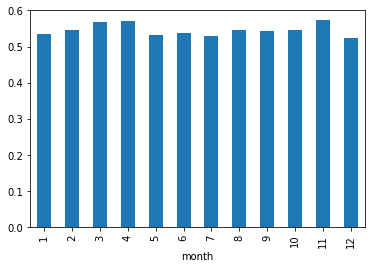

In [54]:
month = new_df['status_dummy'].groupby(new_df['month']).mean()
month.plot.bar()

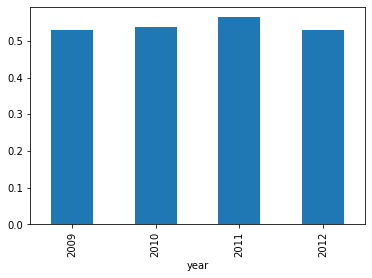

In [55]:
year = new_df['status_dummy'].groupby(new_df['year']).mean()
year.plot.bar()

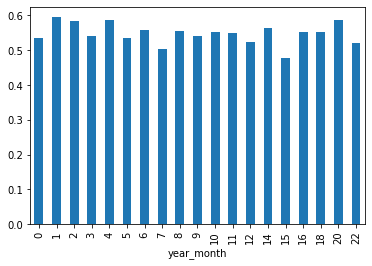

In [56]:
year_month = year = new_df['status_dummy'].groupby(new_df['year_month']).mean()
year_month.plot.bar()

In [78]:
new_df.columns

Index(['project id', 'name', 'url', 'category', 'subcategory', 'location',
       'status', 'goal', 'pledged', 'funded percentage', 'backers',
       'funded date', 'levels', 'reward levels', 'updates', 'comments',
       'duration', 'year', 'month', 'day', 'time', 'day of week', 'city',
       'state', 'country', 'category_dummy', 'subcategory_dummy', 'year_dummy',
       'status_dummy', 'month_dummy', 'year_month'],
      dtype='object')

In [116]:
X = new_df[['year_dummy', 'month_dummy', 'year_month', 'category_dummy', 'country_dummy']]
y = new_df['status_dummy']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [117]:
clf = LogisticRegression(C=0.5, penalty="l1", random_state=0).fit(X_train, y_train)

C:\Users\rayde\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [118]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.5494263862332696
0.5444986138992448


In [119]:
clf.predict_proba(X_test)

array([[0.43931237, 0.56068763],
       [0.46186281, 0.53813719],
       [0.48096537, 0.51903463],
       ...,
       [0.43811792, 0.56188208],
       [0.44955254, 0.55044746],
       [0.458293  , 0.541707  ]])

In [120]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[  25 4752]
 [  13 5671]]


In [121]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print(gnb.score(X_train, y_train))
print(gnb.score(X_test, y_test))

0.5518801784576163
0.5458369180766657


In [122]:
random = RandomForestClassifier(random_state=0)
random.fit(X_train, y_train)
print(random.score(X_train, y_train))
print(random.score(X_test, y_test))

C:\Users\rayde\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6246653919694073
0.5860816365548227


In [123]:
xgboost = XGBClassifier(learning_rate=.5)
eval_set = [(X_test, y_test)]
xgboost.fit(X_train, y_train, eval_metric='auc', eval_set=eval_set, early_stopping_rounds=50)
print(xgboost.score(X_train, y_train))
print(xgboost.score(X_test, y_test))

[0]	validation_0-auc:0.61946
[1]	validation_0-auc:0.62156
[2]	validation_0-auc:0.62226
[3]	validation_0-auc:0.62398
[4]	validation_0-auc:0.62467
[5]	validation_0-auc:0.62489
[6]	validation_0-auc:0.62400
[7]	validation_0-auc:0.62402
[8]	validation_0-auc:0.62427
[9]	validation_0-auc:0.62444
[10]	validation_0-auc:0.62454
[11]	validation_0-auc:0.62451
[12]	validation_0-auc:0.62362
[13]	validation_0-auc:0.62391
[14]	validation_0-auc:0.62365
[15]	validation_0-auc:0.62380


C:\Users\rayde\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16]	validation_0-auc:0.62384
[17]	validation_0-auc:0.62411
[18]	validation_0-auc:0.62436
[19]	validation_0-auc:0.62453
[20]	validation_0-auc:0.62374
[21]	validation_0-auc:0.62356
[22]	validation_0-auc:0.62342
[23]	validation_0-auc:0.62305
[24]	validation_0-auc:0.62258
[25]	validation_0-auc:0.62231
[26]	validation_0-auc:0.62235
[27]	validation_0-auc:0.62240
[28]	validation_0-auc:0.62244
[29]	validation_0-auc:0.62237
[30]	validation_0-auc:0.62185
[31]	validation_0-auc:0.62145
[32]	validation_0-auc:0.62131
[33]	validation_0-auc:0.62111
[34]	validation_0-auc:0.62114
[35]	validation_0-auc:0.62114
[36]	validation_0-auc:0.62118
[37]	validation_0-auc:0.62129
[38]	validation_0-auc:0.62096
[39]	validation_0-auc:0.62091
[40]	validation_0-auc:0.62097
[41]	validation_0-auc:0.62111
[42]	validation_0-auc:0.62111
[43]	validation_0-auc:0.62094
[44]	validation_0-auc:0.62099
[45]	validation_0-auc:0.62092
[46]	validation_0-auc:0.62101
[47]	validation_0-auc:0.62123
[48]	validation_0-auc:0.62129
[49]	valid

In [127]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train,y_train)
dtest = xgb.DMatrix(X_test,y_test)
eval_set = [(X_test, y_test)]
param = {'learning_rate':0.5,'max_depth': 8, 'eval_metric':'auc',
         'objective': 'binary:logistic'}
num_round = 300
xgb.cv(param, dtrain, num_round)

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.640651,0.003175,0.613126,0.002355
1,0.645756,0.003151,0.615875,0.001780
2,0.648743,0.003285,0.616048,0.002436
3,0.650523,0.002836,0.615477,0.003289
4,0.652643,0.001726,0.615442,0.002933
...,...,...,...,...
295,0.684527,0.000625,0.605041,0.002266
296,0.684534,0.000622,0.605031,0.002288
297,0.684535,0.000622,0.605033,0.002283
298,0.684542,0.000624,0.605009,0.002273
